In [ ]:
!pip install pyshine

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib
from tensorflow.keras.layers import Dense,LSTM
from collections import Counter
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn import preprocessing
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input, BatchNormalization, Activation, MaxPooling1D, Dropout

import warnings

import pyttsx3
from threading import Thread

#import tensorboard
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

#make numpy values easy to read
np.set_printoptions(precision=3, suppress=True)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import Callback, EarlyStopping

#Checking Tensorflow Version
tf.__version__

'2.9.0-dev20220224'

In [2]:
warnings.filterwarnings("ignore")

In [3]:
is_voice_on = True
engine = pyttsx3.init()
engine.setProperty('rate', 150)


In [4]:
#Function to extract Feature from images or frame
def extract_feature(input_image):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    image = cv.imread(input_image)
    
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:
        while True:
            results = hands.process(cv.flip(cv.cvtColor(image, cv.COLOR_BGR2RGB),1))
            image_height, image_width, _ = image.shape
            
            if not results.multi_hand_landmarks:

                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.
                
                #Wrist Hand
                wristX = 0
                wristY = 0
                                
                #Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0                
                
                thumb_McpX = 0
                thumb_McpY = 0                
                
                thumb_IpX = 0
                thumb_IpY = 0                
                
                thumb_TipX = 0
                thumb_TipY = 0                
                
                #Index Finger
                index_McpX = 0
                index_McpY = 0                
                
                index_PipX = 0
                index_PipY = 0                
                
                index_DipX = 0
                index_DipY = 0                
                
                index_TipX = 0
                index_TipY = 0                
                
                #Middle Finger
                middle_McpX = 0
                middle_McpY = 0                
                
                middle_PipX = 0
                middle_PipY = 0                
                
                middle_DipX = 0
                middle_DipY = 0                
                
                middle_TipX = 0
                middle_TipY = 0                
                
                #Ring Finger
                ring_McpX = 0
                ring_McpY = 0                
                
                ring_PipX = 0
                ring_PipY = 0                
                
                ring_DipX = 0
                ring_DipY = 0                
                
                ring_TipX = 0
                ring_TipY = 0                
                
                #Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0                
                
                pinky_PipX = 0
                pinky_PipY = 0                
                
                pinky_DipX = 0
                pinky_DipY = 0                
                
                pinky_TipX = 0
                pinky_TipY = 0
                
                
                #Set image to Zero
                annotated_image = 0
                
                #Return Whole Landmark and Image
                return (wristX,wristY,
                        thumb_CmcX,thumb_CmcY,
                        thumb_McpX,thumb_McpY,
                        thumb_IpX,thumb_IpY,
                        thumb_TipX,thumb_TipY,
                        index_McpX,index_McpY,
                        index_PipX,index_PipY,
                        index_DipX,index_DipY,
                        index_TipX,index_TipY,
                        middle_McpX,middle_McpY,
                        middle_PipX,middle_PipY,
                        middle_DipX,middle_DipY,
                        middle_TipX,middle_TipY,
                        ring_McpX,ring_McpY,
                        ring_PipX,ring_PipY,
                        ring_DipX,ring_DipY,                
                        ring_TipX,ring_TipY,
                        pinky_McpX,pinky_McpY,
                        pinky_PipX,pinky_PipY,
                        pinky_DipX,pinky_DipY,
                        pinky_TipX,pinky_TipY,
                        annotated_image)
            
            annotated_image = cv.flip(image.copy(),1)
            for hand_landmarks in results.multi_hand_landmarks:
                
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                                
                #Thumb Finger
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                                
                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                                
                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                                
                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                                
                #Index Finger
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                                
                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                                                
                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                                
                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                 
                
                #Middle Finger
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                                
                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                                                
                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                                
                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                
                
                #Ring Finger
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                                
                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                                                
                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                                
                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
               
                
                #Pinky Finger
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                                
                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                                                
                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                                
                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                
                
                #Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
                return (wristX,wristY,
                        thumb_CmcX,thumb_CmcY,
                        thumb_McpX,thumb_McpY,
                        thumb_IpX,thumb_IpY,
                        thumb_TipX,thumb_TipY,
                        index_McpX,index_McpY,
                        index_PipX,index_PipY,
                        index_DipX,index_DipY,
                        index_TipX,index_TipY,
                        middle_McpX,middle_McpY,
                        middle_PipX,middle_PipY,
                        middle_DipX,middle_DipY,
                        middle_TipX,middle_TipY,
                        ring_McpX,ring_McpY,
                        ring_PipX,ring_PipY,
                        ring_DipX,ring_DipY,            
                        ring_TipX,ring_TipY,
                        pinky_McpX,pinky_McpY,
                        pinky_PipX,pinky_PipY,
                        pinky_DipX,pinky_DipY,
                        pinky_TipX,pinky_TipY,
                        annotated_image)
                
                

In [5]:
#Delete Files
def remove_img(path, img_name):
    os.remove(path + '/' + img_name)
# check if file exists or not
    if os.path.exists(path + '/' + img_name) is False:
        # file did not exists
        return True


In [6]:
#Function to create CSV file or add dataset to the existed CSV file
def toCSV(filecsv, class_type,
          wristX,wristY,
          thumb_CmcX,thumb_CmcY,
          thumb_McpX,thumb_McpY,
          thumb_IpX,thumb_IpY,
          thumb_TipX,thumb_TipY,
          index_McpX,index_McpY,
          index_PipX,index_PipY,
          index_DipX,index_DipY,
          index_TipX,index_TipY,
          middle_McpX,middle_McpY,
          middle_PipX,middle_PipY,
          middle_DipX,middle_DipY,
          middle_TipX,middle_TipY,
          ring_McpX,ring_McpY,
          ring_PipX,ring_PipY,
          ring_DipX,ring_DipY,
          ring_TipX,ring_TipY,
          pinky_McpX,pinky_McpY,
          pinky_PipX,pinky_PipY,
          pinky_DipX,pinky_DipY,
          pinky_TipX,pinky_TipY):
    if os.path.isfile(filecsv):
        with open(filecsv, 'a+', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([wristX,wristY,
                             thumb_CmcX,thumb_CmcY,
                             thumb_McpX,thumb_McpY,
                             thumb_IpX,thumb_IpY,
                             thumb_TipX,thumb_TipY,
                             index_McpX,index_McpY,
                             index_PipX,index_PipY,
                             index_DipX,index_DipY,
                             index_TipX,index_TipY,
                             middle_McpX,middle_McpY,
                             middle_PipX,middle_PipY,
                             middle_DipX,middle_DipY,
                             middle_TipX,middle_TipY,
                             ring_McpX,ring_McpY,
                             ring_PipX,ring_PipY,
                             ring_DipX,ring_DipY,
                             ring_TipX,ring_TipY,
                             pinky_McpX,pinky_McpY,
                             pinky_PipX,pinky_PipY,
                             pinky_DipX,pinky_DipY,
                             pinky_TipX,pinky_TipY,class_type])
    else:
        with open(filecsv, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["wristX","wristY",
                             "thumb_CmcX","thumb_CmcY",
                             "thumb_McpX","thumb_McpY",
                             "thumb_IpX","thumb_IpY",
                             "thumb_TipX","thumb_TipY",
                             "index_McpX","index_McpY",
                             "index_PipX","index_PipY",
                             "index_DipX","index_DipY",
                             "index_TipX","index_TipY",
                             "middle_McpX","middle_McpY",
                             "middle_PipX","middle_PipY",
                             "middle_DipX","middle_DipY",
                             "middle_TipX","middle_TipY",
                             "ring_McpX","ring_McpY",
                             "ring_PipX","ring_PipY",
                             "ring_DipX","ring_DipY",
                             "ring_TipX","ring_TipY",
                             "pinky_McpX","pinky_McpY",
                             "pinky_PipX","pinky_PipY",
                             "pinky_DipX","pinky_DipY",
                             "pinky_TipX","pinky_TipY","class_type"])
            writer.writerow([wristX,wristY,
                             thumb_CmcX,thumb_CmcY,
                             thumb_McpX,thumb_McpY,
                             thumb_IpX,thumb_IpY,
                             thumb_TipX,thumb_TipY,
                             index_McpX,index_McpY,
                             index_PipX,index_PipY,
                             index_DipX,index_DipY,
                             index_TipX,index_TipY,
                             middle_McpX,middle_McpY,
                             middle_PipX,middle_PipY,
                             middle_DipX,middle_DipY,
                             middle_TipX,middle_TipY,
                             ring_McpX,ring_McpY,
                             ring_PipX,ring_PipY,
                             ring_DipX,ring_DipY,
                             ring_TipX,ring_TipY,
                             pinky_McpX,pinky_McpY,
                             pinky_PipX,pinky_PipY,
                             pinky_DipX,pinky_DipY,
                             pinky_TipX,pinky_TipY,class_type])

In [ ]:
# #Extract Featuer for Training
# #Dataset used is SIBI version V02
# paths="./dataset/train_space"
# csv_path="./american_training_space.csv"

# if os.path.exists(csv_path):
#     print("CSV File does exist, the file will be replaced with new one")
#     os.remove(csv_path)
# else:
#     print('The CSV file does not exist', csv_path, ".The file will be created now")
    
# for dirlist in os.listdir(paths):
#     for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
#         print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
#         for filename in filenames:
#             if filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".jpeg") or filename.endswith(".png"):
#                 (wristX,wristY,
#                  thumb_CmcX,thumb_CmcY,
#                  thumb_McpX,thumb_McpY,
#                  thumb_IpX,thumb_IpY,
#                  thumb_TipX,thumb_TipY,
#                  index_McpX,index_McpY,
#                  index_PipX,index_PipY,
#                  index_DipX,index_DipY,
#                  index_TipX,index_TipY,
#                  middle_McpX,middle_McpY,
#                  middle_PipX,middle_PipY,
#                  middle_DipX,middle_DipY,
#                  middle_TipX,middle_TipY,
#                  ring_McpX,ring_McpY,
#                  ring_PipX,ring_PipY,
#                  ring_DipX,ring_DipY,
#                  ring_TipX,ring_TipY,
#                  pinky_McpX,pinky_McpY,
#                  pinky_PipX,pinky_PipY,
#                  pinky_DipX,pinky_DipY,
#                  pinky_TipX,pinky_TipY,
#                  annotated_image) = extract_feature(os.path.join(root, filename))
                
#                 if ((not wristX == 0) and (not wristY == 0)):
#                     toCSV(csv_path, dirlist,
#                          wristX,wristY,
#                          thumb_CmcX,thumb_CmcY,
#                          thumb_McpX,thumb_McpY,
#                          thumb_IpX,thumb_IpY,
#                          thumb_TipX,thumb_TipY,
#                          index_McpX,index_McpY,
#                          index_PipX,index_PipY,
#                          index_DipX,index_DipY,
#                          index_TipX,index_TipY,
#                          middle_McpX,middle_McpY,
#                          middle_PipX,middle_PipY,
#                          middle_DipX,middle_DipY,
#                          middle_TipX,middle_TipY,
#                          ring_McpX,ring_McpY,
#                          ring_PipX,ring_PipY,
#                          ring_DipX,ring_DipY,
#                          ring_TipX,ring_TipY,
#                          pinky_McpX,pinky_McpY,
#                          pinky_PipX,pinky_PipY,
#                          pinky_DipX,pinky_DipY,
#                          pinky_TipX,pinky_TipY)
#                 else:
#                     print(os.path.join(root, filename), "Hand does not have landmarks")
#                     #remove_img(root, filename)
                    
# print("===============================Featuer Extraction for Training is Completed================================")
                        

In [ ]:
#Extract Featuer for Training
#Dataset used is SIBI version V02
# paths="./dataset/validation/"
# csv_path="american_validation.csv"

# if os.path.exists(csv_path):
#     print("CSV File does exist, the file will be replaced with new one")
#     os.remove(csv_path)
# else:
#     print('The CSV file does not exist', csv_path, ".The file will be created now")
    
# for dirlist in os.listdir(paths):
#     for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
#         print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
#         for filename in filenames:
#             if filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".jpeg"):
#                 (wristX,wristY,
#                  thumb_CmcX,thumb_CmcY,
#                  thumb_McpX,thumb_McpY,
#                  thumb_IpX,thumb_IpY,
#                  thumb_TipX,thumb_TipY,
#                  index_McpX,index_McpY,
#                  index_PipX,index_PipY,
#                  index_DipX,index_DipY,
#                  index_TipX,index_TipY,
#                  middle_McpX,middle_McpY,
#                  middle_PipX,middle_PipY,
#                  middle_DipX,middle_DipY,
#                  middle_TipX,middle_TipY,
#                  ring_McpX,ring_McpY,
#                  ring_PipX,ring_PipY,
#                  ring_DipX,ring_DipY,
#                  ring_TipX,ring_TipY,
#                  pinky_McpX,pinky_McpY,
#                  pinky_PipX,pinky_PipY,
#                  pinky_DipX,pinky_DipY,
#                  pinky_TipX,pinky_TipY,
#                  annotated_image) = extract_feature(os.path.join(root, filename))
                
#                 if ((not wristX == 0) and (not wristY == 0)):
#                     toCSV(csv_path, dirlist,
#                          wristX,wristY,
#                          thumb_CmcX,thumb_CmcY,
#                          thumb_McpX,thumb_McpY,
#                          thumb_IpX,thumb_IpY,
#                          thumb_TipX,thumb_TipY,
#                          index_McpX,index_McpY,
#                          index_PipX,index_PipY,
#                          index_DipX,index_DipY,
#                          index_TipX,index_TipY,
#                          middle_McpX,middle_McpY,
#                          middle_PipX,middle_PipY,
#                          middle_DipX,middle_DipY,
#                          middle_TipX,middle_TipY,
#                          ring_McpX,ring_McpY,
#                          ring_PipX,ring_PipY,
#                          ring_DipX,ring_DipY,
#                          ring_TipX,ring_TipY,
#                          pinky_McpX,pinky_McpY,
#                          pinky_PipX,pinky_PipY,
#                          pinky_DipX,pinky_DipY,
#                          pinky_TipX,pinky_TipY)
#                 else:
                    
#                     print(os.path.join(root, filename), "Hand does not have landmarks")
#                     #remove_img(root, filename)
                    
# print("===============================Featuer Extraction for Validation is Completed================================")

In [7]:
#Read Training csv file
#df_train = pd.read_csv('hands_SIBI_training.csv', header=0)
df_train = pd.read_csv('american_training.csv', header=0)


In [8]:
df_train.columns = [i for i in range(df_train.shape[1])]
df_train = df_train.rename(columns={42:'class_type'})
df_train = df_train.sort_values(by=["class_type"])

df_train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,class_type
0,1000.230789,1316.776199,850.471344,1245.884514,742.863808,1063.442001,696.777992,906.248760,632.845116,794.006939,...,1221.548309,1172.733536,975.514412,1130.592270,986.893043,1097.727242,1114.666901,1066.119461,1200.280609,A
3468,73.333389,155.259800,49.790385,145.502412,30.123091,118.640280,27.373829,93.417323,33.933997,77.106667,...,131.023288,93.845147,113.462615,95.961833,104.241145,92.041337,120.953822,87.668484,132.476962,A
3467,73.949933,148.149133,50.492072,141.764855,30.036971,114.270937,28.486604,87.665433,37.839282,72.027230,...,125.335097,93.988252,108.822095,96.699738,100.023544,93.434680,116.339600,88.925689,125.961387,A
3466,77.980763,148.956657,53.256589,139.718998,32.214144,114.121628,28.527832,88.724798,36.203569,72.813392,...,123.856473,94.810069,106.177139,97.026861,95.915931,94.427669,111.931860,90.989864,123.853660,A
3465,79.406494,145.706511,54.689348,137.104821,33.304521,111.537206,29.558751,85.922170,37.054923,70.040119,...,119.094264,95.229065,102.956891,97.149777,92.136455,94.960862,107.896459,91.335928,119.704676,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108341,400.952911,284.038753,392.078514,251.386099,397.874832,223.714127,396.493721,203.941484,394.308243,184.587078,...,164.286661,448.071327,236.703429,464.044037,212.701635,462.308273,193.104544,455.945930,179.442716,space
108340,435.090561,409.500103,430.772133,374.556084,442.747879,342.085361,447.420616,319.372215,448.235970,297.229300,...,314.132023,500.686035,377.174006,525.560837,363.106098,524.883041,343.338690,515.901032,329.197597,space
108339,433.801537,407.049293,430.231056,373.599100,442.837601,341.574469,447.467155,319.008751,448.301506,296.823463,...,314.231415,499.990616,377.689362,525.474091,363.309288,525.046578,343.328762,516.096878,329.223633,space
108346,436.080780,410.168409,430.578766,373.275490,441.528320,340.751781,446.161270,318.195820,446.650124,296.453161,...,312.138176,500.840187,375.500021,526.087303,360.426321,524.767189,340.692158,515.510597,326.873646,space


In [9]:
df_train['class_type'].value_counts()

F        7105
L        6898
K        6288
G        6170
D        6126
C        5997
W        5848
R        5820
B        5756
Y        5743
H        5735
V        5655
J        5639
I        5593
T        5573
O        5475
E        5422
S        5302
Z        5255
U        5245
A        5195
X        5003
M        4697
Q        4447
P        4431
N        3986
del      1851
space    1227
Name: class_type, dtype: int64

In [10]:
# Save class labels and number of classes
labels = df_train["class_type"].values
n_classes = len(np.unique(labels))
print(np.unique(labels))

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'space']


In [11]:
# Hard Encode for the Prediction
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25,
    'space': 26,
    'del': 27,
    'nothing': 28    
}

<AxesSubplot:xlabel='class_type', ylabel='count'>

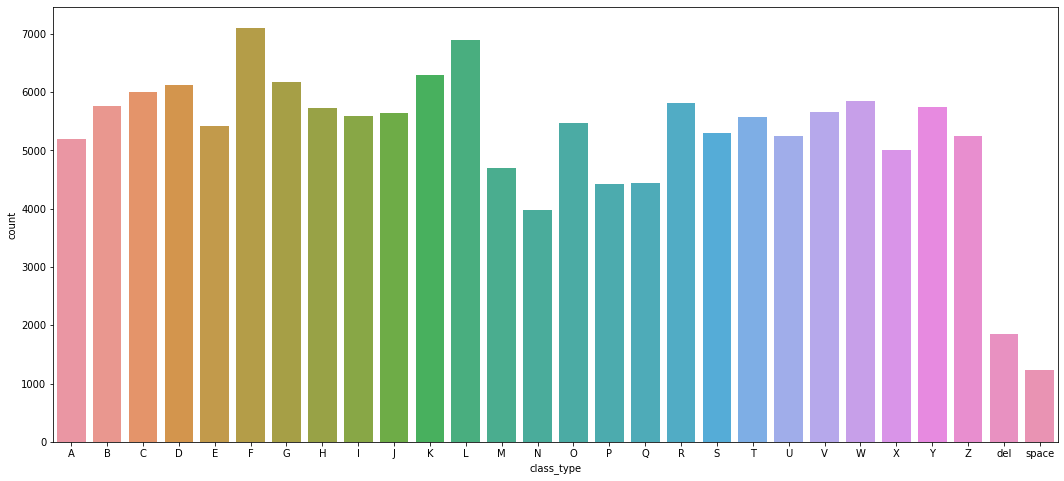

In [12]:
# Plot distribution of "labels"
plt.figure(figsize = (18,8))
sns.countplot(x ='class_type', data = df_train)

In [13]:
#Removing all null values
all_null_values = df_train[df_train.iloc[:,0]==0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 0


In [14]:
#Dropping Null values
df_train.drop(all_null_values.index, inplace=True)

In [15]:
#Find Outliers
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    #plt.gird(False)
    plt.show()

In [16]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [17]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

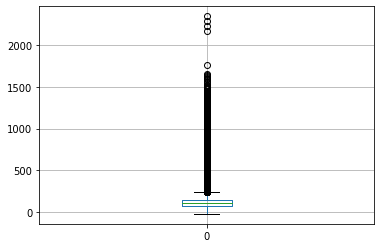

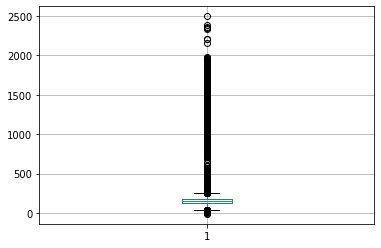

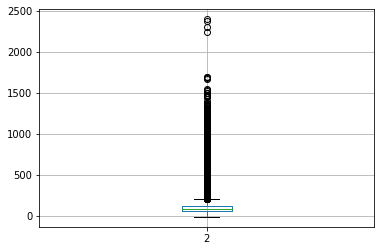

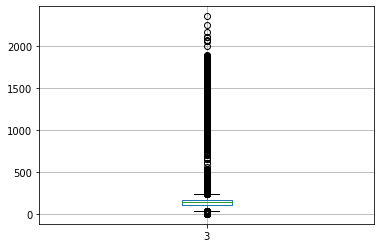

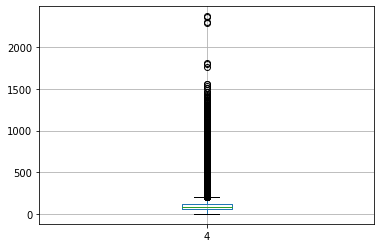

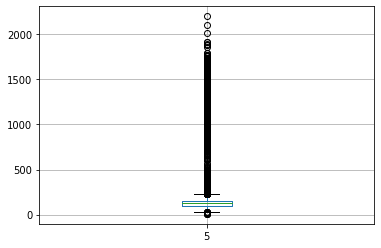

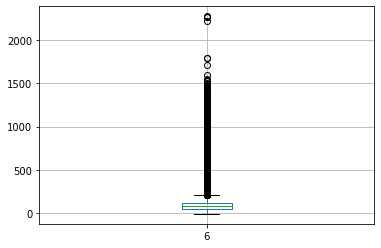

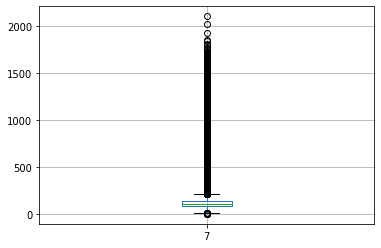

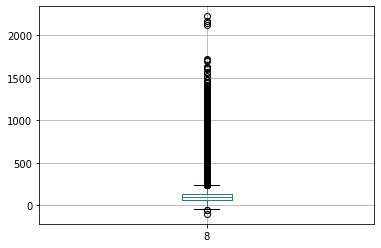

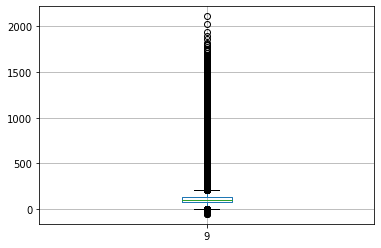

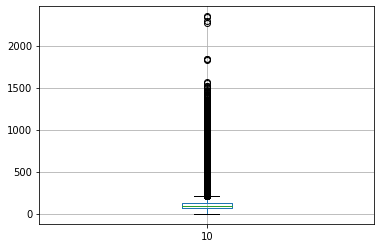

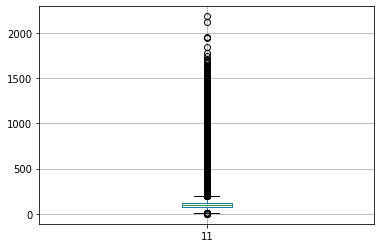

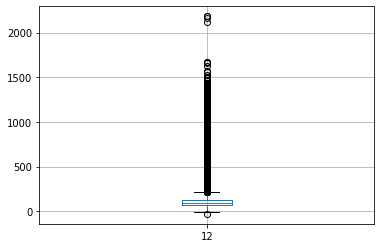

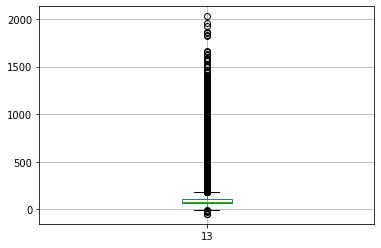

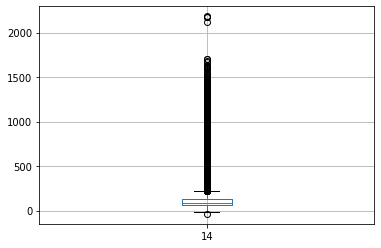

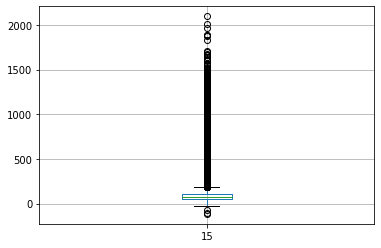

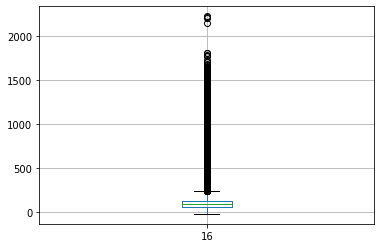

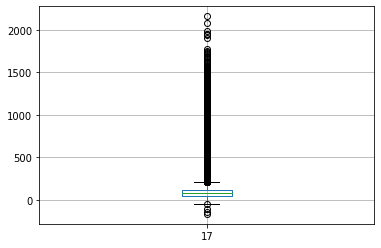

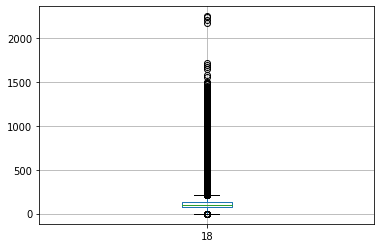

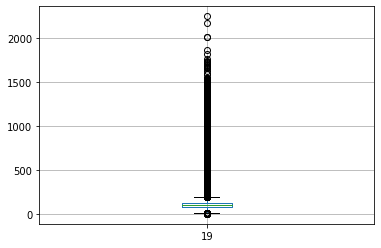

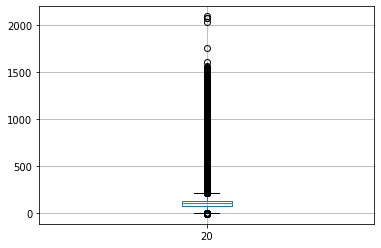

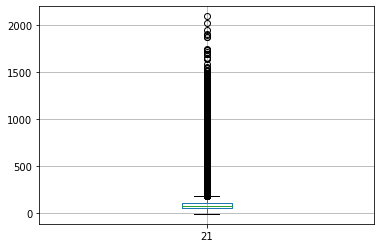

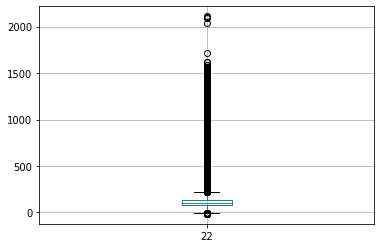

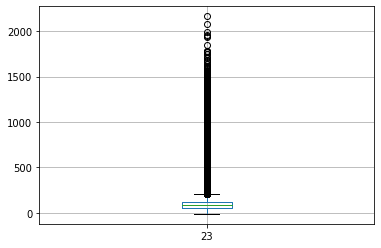

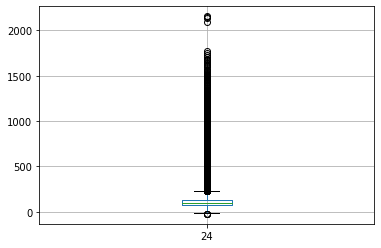

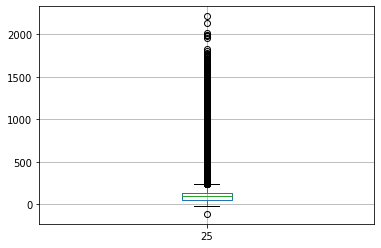

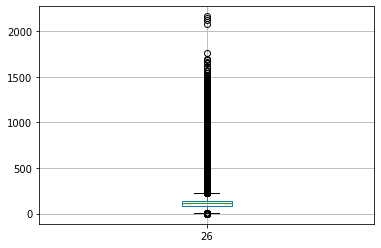

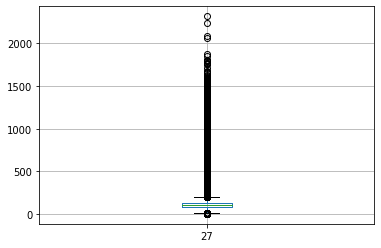

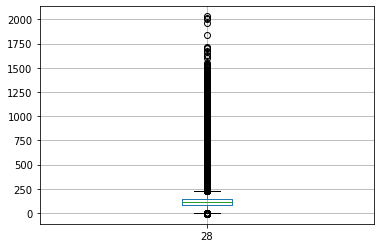

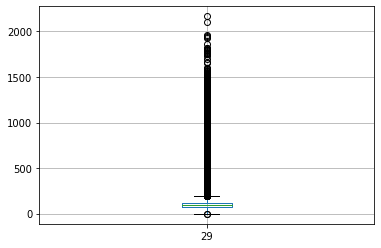

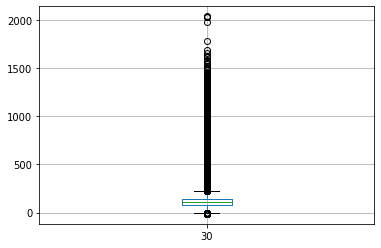

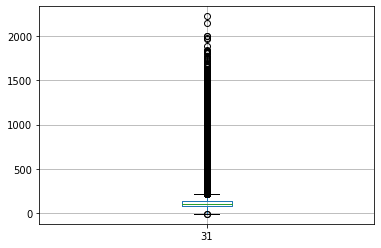

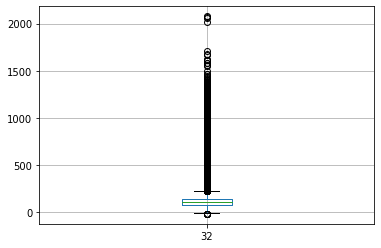

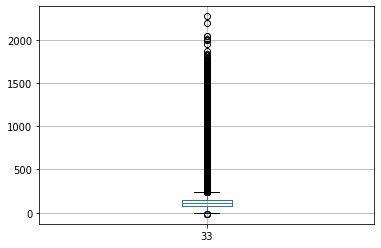

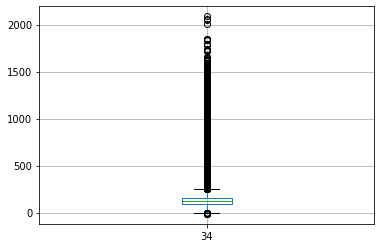

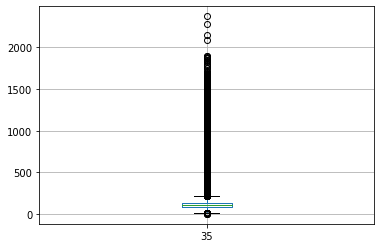

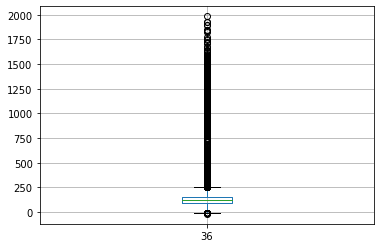

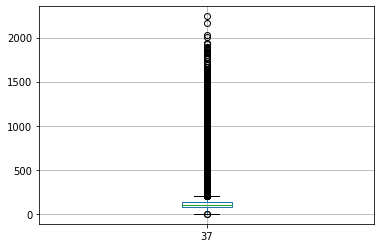

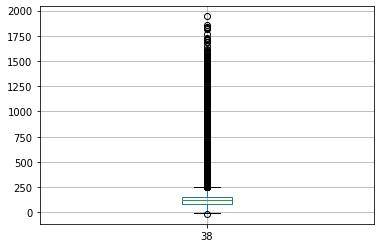

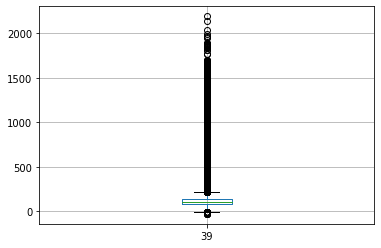

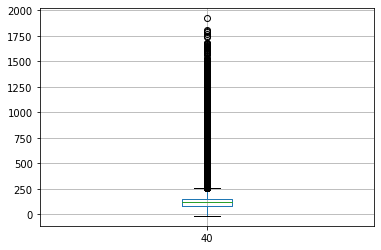

In [18]:
#Train 
for i in range(41):
    plot_boxplot(df_train,i)

In [19]:
#Create an empty list

index_list=[]
for j in range(41):
    index_list.extend(outliers(df_train,i))

In [20]:
index_list

[0,
 4766,
 4764,
 4763,
 4762,
 4769,
 4761,
 4756,
 4755,
 4754,
 4753,
 4760,
 4752,
 4770,
 4772,
 4788,
 4787,
 4786,
 4785,
 4783,
 4782,
 4771,
 4781,
 4779,
 4778,
 4777,
 4776,
 4774,
 4773,
 4780,
 4751,
 4750,
 4727,
 4726,
 4725,
 4724,
 4723,
 4722,
 4721,
 4720,
 4717,
 4716,
 4715,
 4714,
 4713,
 4712,
 4731,
 4748,
 4746,
 4745,
 4744,
 4743,
 4742,
 4741,
 4740,
 4736,
 4735,
 4734,
 4733,
 4732,
 4789,
 4711,
 4790,
 4792,
 4849,
 4848,
 4847,
 4846,
 4845,
 4843,
 4850,
 4840,
 4839,
 4838,
 4837,
 4836,
 4835,
 4841,
 4833,
 4851,
 4853,
 4867,
 4866,
 4865,
 4864,
 4862,
 4860,
 4859,
 4858,
 4857,
 4856,
 4855,
 4861,
 4832,
 4831,
 4830,
 4808,
 4807,
 4805,
 4803,
 4802,
 4809,
 4801,
 4799,
 4798,
 4797,
 4796,
 4795,
 4793,
 4800,
 4810,
 4811,
 4812,
 4829,
 4828,
 4827,
 4826,
 4825,
 4823,
 4822,
 4821,
 4820,
 4819,
 4818,
 4817,
 4815,
 4813,
 4791,
 4710,
 4606,
 4605,
 4603,
 4602,
 4601,
 4600,
 4607,
 4599,
 4597,
 4595,
 4593,
 4592,
 4591,
 4598,
 4

In [21]:
df_train = remove(df_train,index_list)



In [22]:
df_train.shape

(134496, 43)

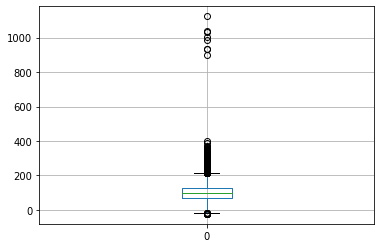

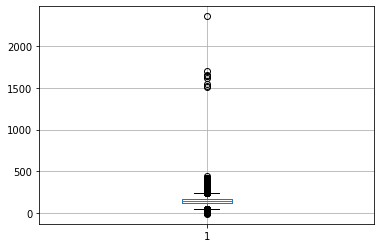

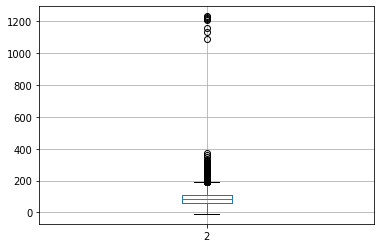

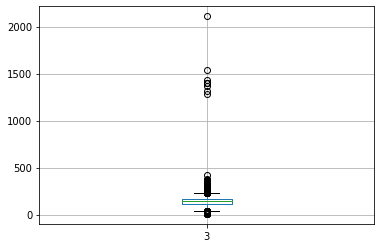

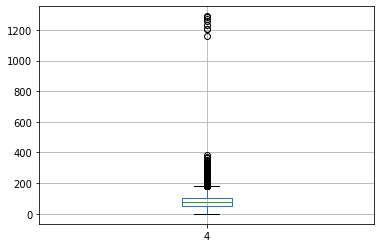

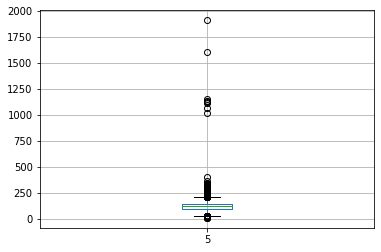

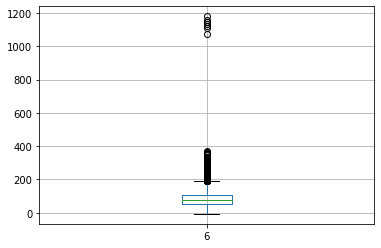

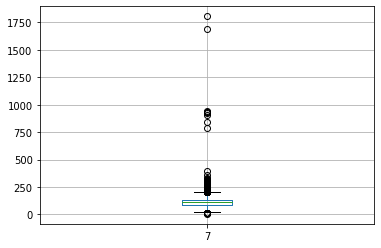

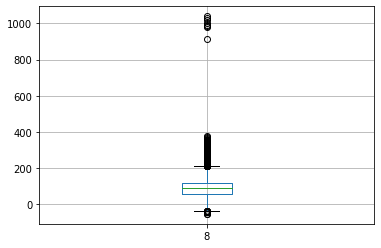

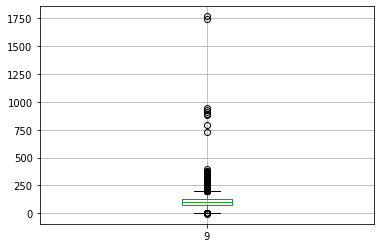

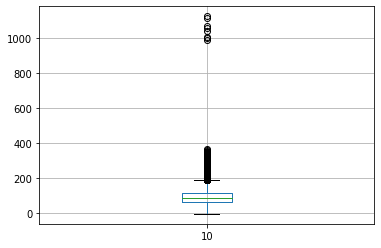

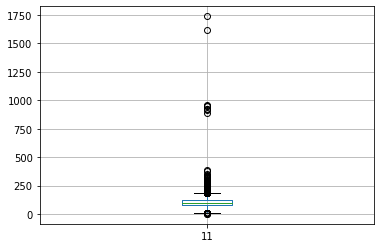

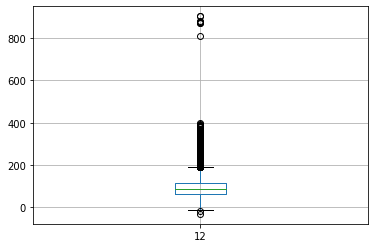

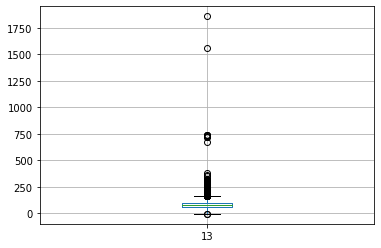

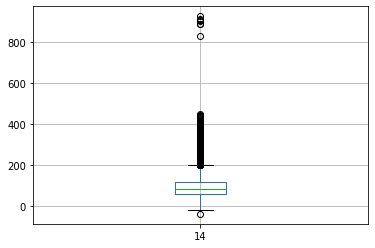

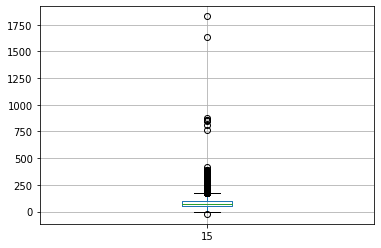

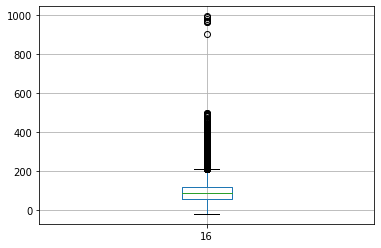

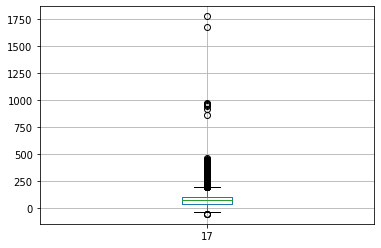

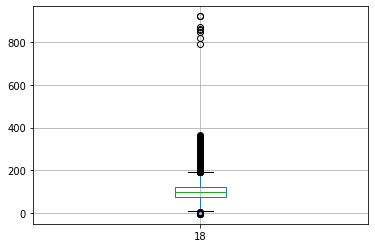

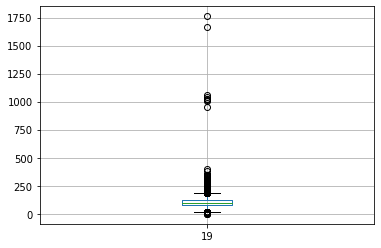

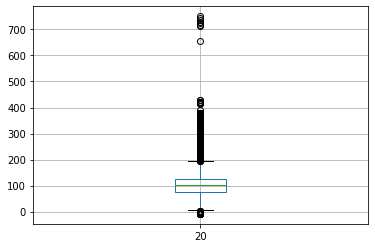

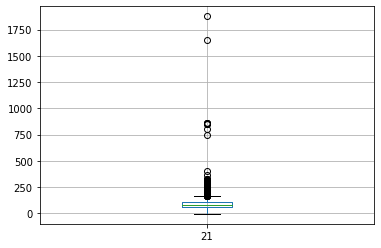

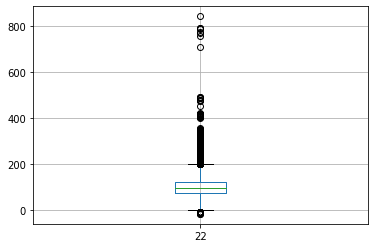

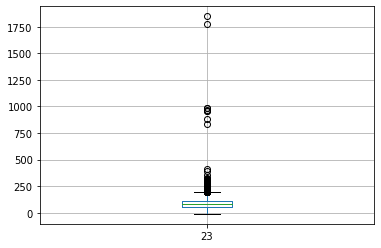

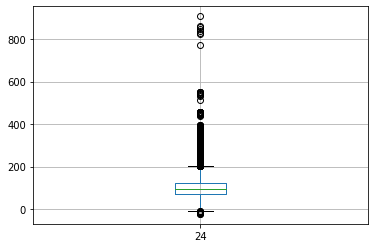

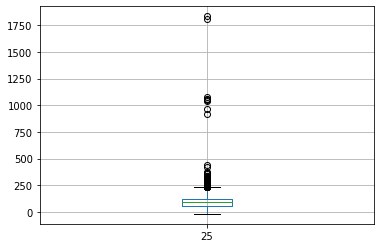

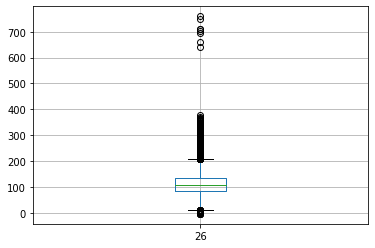

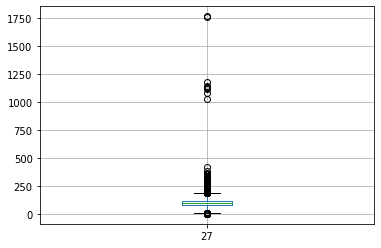

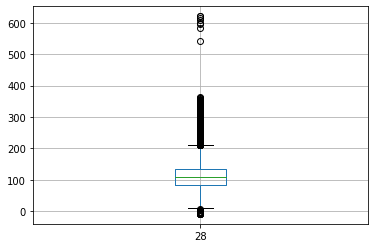

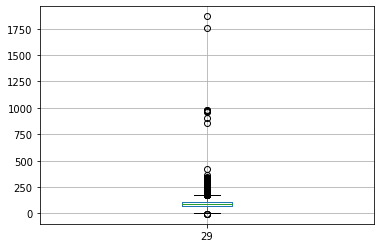

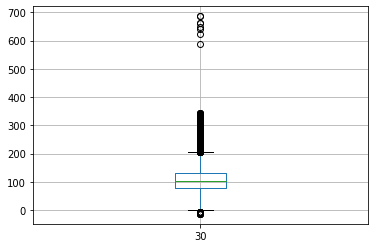

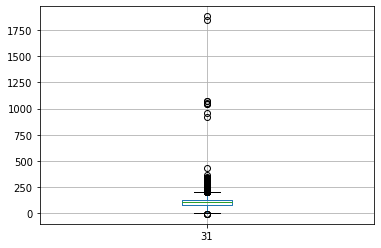

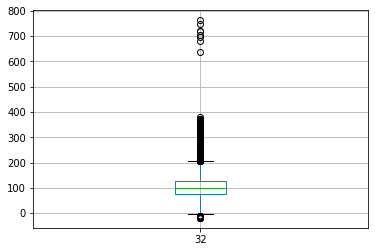

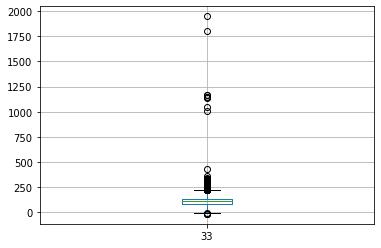

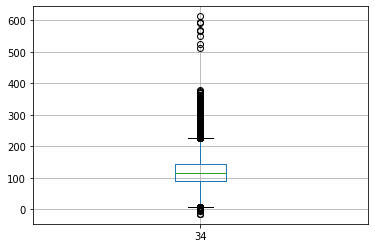

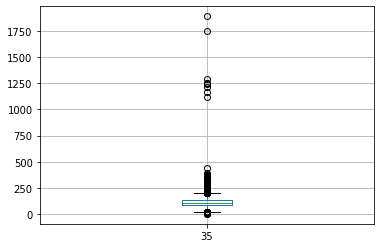

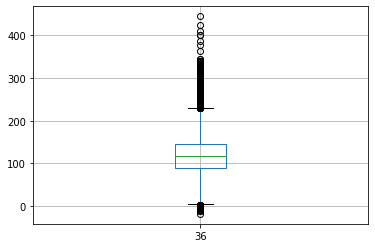

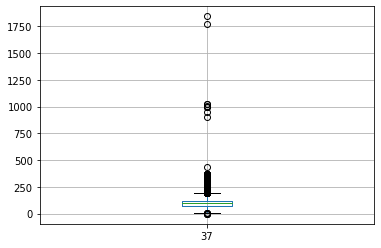

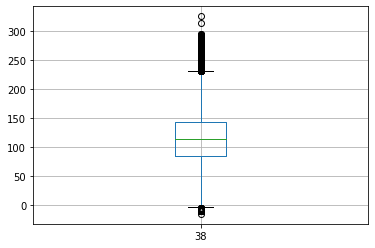

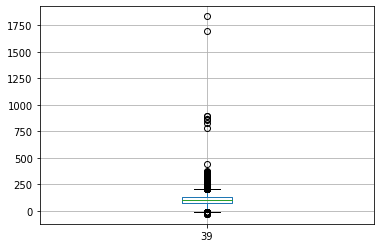

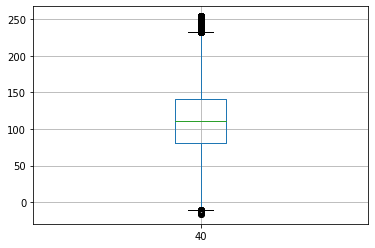

In [23]:
for i in range(41):
    plot_boxplot(df_train,i)

In [24]:
# Put Categorical using Pandas
output = df_train["class_type"]
df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes


In [25]:
# Copy Label and Feature for training
y_train = df_train.pop("class_type")
x_train = df_train.copy()

In [26]:
#DATA Normalizing X_train
x_train = preprocessing.normalize(x_train)
x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.121415,0.257057,0.082436,0.240903,0.049874,0.196428,0.045322,0.154667,0.056183,0.127662,...,0.124738,0.216930,0.155376,0.187856,0.158880,0.172588,0.152389,0.200258,0.145149,0.219337
1,0.125854,0.252132,0.085931,0.241266,0.051119,0.194475,0.048481,0.149196,0.064398,0.122582,...,0.127599,0.213305,0.159956,0.185202,0.164571,0.170228,0.159014,0.197996,0.151341,0.214371
2,0.133680,0.255351,0.091296,0.239515,0.055224,0.195635,0.048904,0.152098,0.062062,0.124821,...,0.134690,0.212323,0.162529,0.182016,0.166330,0.164425,0.161874,0.191881,0.155981,0.212318
3,0.138670,0.254452,0.095506,0.239431,0.058161,0.194781,0.051619,0.150049,0.064710,0.122313,...,0.138984,0.207978,0.166302,0.179797,0.169656,0.160901,0.165833,0.188423,0.159503,0.209044
4,0.144232,0.251446,0.098842,0.242086,0.056072,0.193297,0.048658,0.143788,0.065765,0.115237,...,0.144719,0.209890,0.169730,0.172288,0.172545,0.156063,0.171324,0.187094,0.167067,0.208141


In [27]:
# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)


In [28]:
# Check Array Shape before transformation
print(x_train.shape)


# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)




(134496, 42)
(134496, 42, 1)


In [29]:
# Check sample train and test features
# print(x_train[0])
# print(x_test[7])

In [30]:
# Number of classes according standard Indonesian Language Alphabets
num_classes = 29

# Using the Keras.Utils to put the label categorically 
y_train = to_categorical(y_train, num_classes)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((107596, 42, 1), (26900, 42, 1), (107596, 29), (26900, 29))

In [33]:
x_train.shape[1:3]

(42, 1)

In [ ]:
learning_rate=0.0001


# One Dimensional Convolutional Neural Network model, Train will be feed to 1 Dimension Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    #tf.keras.layers.MaxPooling1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    #tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
#     #tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    
#     tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
#     #tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.Dropout(rate=0.4),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(rate=0.4),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(num_classes, activation='softmax')])

In [ ]:
# learning_rate=0.0001
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=x_train.shape[1:3]))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

In [ ]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
#model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

In [ ]:
#Train the Model
history = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_test, y_test), callbacks=[tensorboard])

In [ ]:
results = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

In [ ]:
model.predict_proba(x_test)

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model_american', 'wb'))

In [ ]:
joblib.dump(model, 'model_american.sav')

In [3]:
# Save model as pickle file
#joblib.dump(model, "model_american.pkl")
with open("model_american.pkl", "wb") as f:
       pickle.dump(model, f)

NameError: name 'model' is not defined

In [ ]:
# model.save("model_american.h5")

In [ ]:
# Directly from Imageset Dataset Testing
#Load Image and do Feature Extraction
path_to_image = "./SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/F (3).jpg"

(wristX, wristY,
 thumb_CmcX, thumb_CmcY,
 thumb_McpX, thumb_McpY,
 thumb_IpX, thumb_IpY,
 thumb_TipX, thumb_TipY,
 index_McpX, index_McpY,
 index_PipX, index_PipY,
 index_DipX, index_DipY,
 index_TipX, index_TipY,
 middle_McpX, middle_McpY,
 middle_PipX, middle_PipY,
 middle_DipX, middle_DipY,
 middle_TipX, middle_TipY,
 ring_McpX, ring_McpY,
 ring_PipX, ring_PipY,
 ring_DipX, ring_DipY,
 ring_TipX, ring_TipY,
 pinky_McpX, pinky_McpY,
 pinky_PipX, pinky_PipY,
 pinky_DipX, pinky_DipY,
 pinky_TipX, pinky_TipY,
 output_IMG) = extract_feature(path_to_image)

plt.axis("on")
plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
predict_x=model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)
predict_x

In [ ]:
y_test
classes_y=np.argmax(y_test,axis=1)
classes_y

In [ ]:
from sklearn import metrics

cf_matrix = metrics.confusion_matrix(classes_y, classes_x)

In [ ]:
labels = sorted(list(set(output)))
labels = [x.upper() for x in labels]
labels

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(classes_x, classes_y,target_names=labels))

In [ ]:
#Shape the image features into an 1x3 array.
input_IMG = np.array([[[wristX], [wristY],
                     [thumb_CmcX], [thumb_CmcY],
                     [thumb_McpX], [thumb_McpY],
                     [thumb_IpX], [thumb_IpY],
                     [thumb_TipX], [thumb_TipY],
                     [index_McpX], [index_McpY],
                     [index_PipX], [index_PipY],
                     [index_DipX], [index_DipY],
                     [index_TipX], [index_TipY],
                     [middle_McpX], [middle_McpY],
                     [middle_PipX], [middle_PipY],
                     [middle_DipX], [middle_DipY],
                     [middle_TipX], [middle_TipY],
                     [ring_McpX], [ring_McpY],
                     [ring_PipX], [ring_PipY],
                     [ring_DipX], [ring_DipY],
                     [ring_TipX], [ring_TipY],
                     [pinky_McpX], [pinky_McpY],
                     [pinky_PipX], [pinky_PipY],
                     [pinky_DipX], [pinky_DipY],
                     [pinky_TipX], [pinky_TipY],]])

print(input_IMG.shape)
print(input_IMG)

In [ ]:
input_IMG.shape

In [ ]:
#Print prediction using defined Classes
predictions = classes_x
for alphabets, values in classes.items():
    if values == predictions[0] :
        print("Possible Alphabet according to the input : ", alphabets)

# Visualizing 

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# from keras.models import load_model
# model = load_model('model_american.h5')

In [6]:
import pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [16]:
x_test

NameError: name 'x_test' is not defined

In [17]:
proba_str = model.predict_proba([[0.325752854347229, 0.9598181843757629, 0.3526579737663269, 0.9424720406532288, 0.3792518973350525, 0.9240488409996033, 0.40350213646888733, 0.9199249744415283, 0.42576414346694946, 0.9275805354118347, 0.373000830411911, 0.8860394954681396, 0.40804070234298706, 0.8958154320716858, 0.42894235253334045, 0.9130456447601318, 0.44214025139808655, 0.9283350110054016, 0.36860302090644836, 0.8871005177497864, 0.4052424728870392, 0.8990107178688049, 0.42753130197525024, 0.9159035086631775, 0.44317826628685, 0.9313869476318359, 0.3671325445175171, 0.8943575024604797, 0.40483975410461426, 0.9044559001922607, 0.4272681176662445, 0.9195631146430969, 0.44297486543655396, 0.9344357252120972, 0.36743971705436707, 0.9071312546730042, 0.3994187116622925, 0.9135122299194336, 0.41952359676361084, 0.9246867299079895, 0.434166818857193, 0.9350578188896179]])
proba_str

array([[0.01 , 0.017, 0.006, 0.006, 0.013, 0.015, 0.076, 0.019, 0.041,
        0.029, 0.007, 0.05 , 0.24 , 0.014, 0.007, 0.043, 0.169, 0.015,
        0.068, 0.012, 0.025, 0.009, 0.005, 0.021, 0.065, 0.016]])

In [18]:
max_proba_index = np.argmax(proba_str)
max_proba_index

12

In [19]:
max_proba_val = proba_str[0][max_proba_index]
max_proba_val

0.24007340317788609

In [20]:
import pyshine as ps
import time

Warning! No module named 'sounddevice'


In [21]:
global is_voice_on

In [51]:

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# For webcam input:
hands = mp_hands.Hands(
    min_detection_confidence=0.7, min_tracking_confidence=0.5)

cap = cv.VideoCapture(0)

def data_clean(landmark):
  
  data = landmark[0]
  
  
  try:
    data = str(data)

    data = data.strip().split('\n')

    garbage = ['landmark {', '  visibility: 0.0', '  presence: 0.0', '}']

    without_garbage = []

    for i in data:
        if i not in garbage:
            without_garbage.append(i)

    clean = []

    for i in without_garbage:
        i = i.strip()
        clean.append(i[2:])

#     for i in range(0, len(clean)):
#         clean[i] = float(clean[i])
        
    finalClean = []
    for i in range(0, len(clean)):
        if (i+1) % 3 != 0:
            #clean[i] = float(clean[i]) # Original
            finalClean.append(float(clean[i]))

    
    return([finalClean])

  except:
    return(np.zeros([1,42], dtype=int)[0])


res, score = '', 0.0
i = 0
mem = ''
consecutive = 0
sequence = ''
text = ""
count_same_frames= 0
    
while cap.isOpened():
    success, image = cap.read()
    
    image = cv.flip(image, 1)
    old_text = text
  
    if not success:
        break

      # Flip the image horizontally for a later selfie-view display, and convert
      # the BGR image to RGB.
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
      # To improve performance, optionally mark the image as not writeable to
      # pass by reference.
    image.flags.writeable = False
    results = hands.process(image)

      # Draw the hand annotations on the image.
    image.flags.writeable = True

    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
              mp_drawing.draw_landmarks(
                  image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
              )

        cleaned_landmark = data_clean(results.multi_hand_landmarks)
        #print(results.multi_hand_landmarks[0])
        
        
        if cleaned_landmark:
            clf = joblib.load('model.pkl')          
            
            
            overlay = image.copy()
            
            # status box
            cv.rectangle(overlay, (0,800), (800, 400), (0, 0, 0, 0.5), -1)
            
            alpha = 0.6
            
            image = cv.addWeighted(overlay, alpha, image, 1 - alpha, 0)
            
            y_pred = clf.predict(cleaned_landmark)
            proba_str = clf.predict_proba(cleaned_landmark)
            max_proba_index = np.argmax(proba_str)
            max_proba_val = proba_str[0][max_proba_index]
            
            if old_text == y_pred:
                count_same_frames += 1
            else:
                count_same_frames = 0
            
            
            if count_same_frames > 20:                
                    
                    if len(y_pred) == 1:
                        Thread(target=say_text, args=(y_pred, )).start()
                    sequence = word + y_pred
                    count_same_frames = 0
                    old_text = y_pred
            
            
            #print("{:.2f}".format(proba_str))

            #image = cv2.putText(image, str(y_pred[0]), (50,150), cv2.FONT_HERSHEY_SIMPLEX,  3, (0,0,255), 2, cv2.LINE_AA)
            
            
            
            if i > 20 and max_proba_val > 0.9:
                
                score = max_proba_val
                res = y_pred[0]
                i = 0
                if mem == res:                    
                    consecutive += 1
                else:                    
                    consecutive = 0
                if consecutive == 2 and res not in ['nothing']:
                    if res == 'L':                        
                        sequence += ' '                        
                    elif res == 'S':
                        sequence += ' '
                        Thread(target=say_text, args=(sequence,)).start()
                    elif res == 'J':
                        sequence = sequence[:-1]
                    else:
                        sequence += res
                    consecutive = 0
            i += 1  
           
            
            if (max_proba_val > 0.9):
                mem = res
                
                                   
            cv.putText(image, 'Predicted Letter'
                        , (50,420), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv.LINE_AA)
            cv.putText(image, '%s' % (sequence.upper())
                        , (50,455), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
#             cv.putText(image, 'Score', (20,30), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv.LINE_AA)
#             cv.putText(image, str("{:.2f}".format(max_proba_val)), (20,60), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
#             #np.argmax(proba_str)            
                            
            text  =  'Score'
            image = ps.putBText(image,text,text_offset_x=500,text_offset_y=331,vspace=10,hspace=10, font_scale=0.65,background_RGB=(142,195,67),text_RGB=(255,255,255),alpha=0.1,font=cv.FONT_HERSHEY_SIMPLEX)
            image = ps.putBText(image,str("{:.2f}".format(max_proba_val)),text_offset_x=500,text_offset_y=366,vspace=10,hspace=10, font_scale=1.05,background_RGB=(142,195,67),text_RGB=(255,255,255),alpha=0.1,font=cv.FONT_HERSHEY_SIMPLEX)
            
            
                
            
            image = ps.putBText(image,y_pred[0],text_offset_x=50,text_offset_y=366,vspace=10,hspace=10, font_scale=1.05,background_RGB=(142,195,67),text_RGB=(255,255,255),alpha=0.1,font=cv.FONT_HERSHEY_SIMPLEX)
            
                            
    cv.imshow('MediaPipe Hands', image)

    if cv.waitKey(5) & 0xFF == 27:
        break

hands.close()
cap.release()
cv.destroyAllWindows()
    

In [50]:
cap.release()

In [35]:
def say_text(text):
    if not is_voice_on:
        return
    while engine._inLoop:
        pass
    engine.say(text)
    engine.runAndWait()